In [1]:
import urllib2
from bs4 import BeautifulSoup
import re
import nytimesarticle as nyta
import urllib2
import requests
import csv
import time
import pandas as pd
import numpy as np
import nytimes_crawl_2 as nytc
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

# Misc

In [223]:
names = ['one','two','three','four','five','six','seven','eight','nine','ten','eleven','twelve','thirteen','fourteen','fifteen']

## Analysis

### Scrape

In [8]:
reader1 = nytc.OpEdReader('one')
reader1.save_oped_articles_all_pages(begindate='20160101',enddate='20160331')

In [ ]:
reader2 = nytc.OpEdReader('two')
reader2.save_oped_articles_all_pages(begindate='20161001',enddate='20160107')

In [ ]:
reader3 = nytc.OpEdReader('three')
reader3.save_oped_articles_all_pages(begindate='20150701',enddate='20151011')

In [ ]:
reader4 = nytc.OpEdReader('four')
reader4.save_oped_articles_all_pages(begindate='20150401',enddate='20150717')

In [ ]:
reader5 = nytc.OpEdReader('five')
reader5.save_oped_articles_all_pages(begindate='20150101',enddate='20150421')

In [ ]:
reader6 = nytc.OpEdReader('six')
reader6.save_oped_articles_all_pages(begindate='20141001',enddate='20150125')

### Load

In [647]:
reader1 = nytc.OpEdReader.init_from_file('one','one100.csv')
reader2 = nytc.OpEdReader.init_from_file('two','two100.csv')
reader3 = nytc.OpEdReader.init_from_file('three','three100.csv')
reader4 = nytc.OpEdReader.init_from_file('four','four100.csv')
reader5 = nytc.OpEdReader.init_from_file('five','five100.csv')
reader6 = nytc.OpEdReader.init_from_file('six','six100.csv')
reader7 = nytc.OpEdReader.init_from_file('seven','actual_seven100.csv')
reader8 = nytc.OpEdReader.init_from_file('eight','seven100.csv')
reader9 = nytc.OpEdReader.init_from_file('nine','eight100.csv')
reader10 = nytc.OpEdReader.init_from_file('ten','nine100.csv')

In [648]:
readers = [reader1,reader2,reader3,reader4,reader5,reader6,reader7,reader8,reader9,reader10]

### Eliminate 'Universal' Articles

In [577]:
def elim_universal_wrapper(reader):
    print(reader.data.shape)
    reader.elim_universal()
    print(reader.data.shape)

In [649]:
for reader in readers:
    elim_universal_wrapper(reader)

(947, 8)
(940, 8)
(952, 8)
(943, 8)
(959, 8)
(948, 8)
(945, 8)
(941, 8)
(944, 8)
(929, 8)
(955, 8)
(954, 8)
(953, 8)
(953, 8)
(967, 8)
(967, 8)
(965, 8)
(964, 8)
(948, 8)
(948, 8)


# Text Manipulation

In [61]:
import nltk

In [59]:
PUNCTUATION = """!@#$%^&*()_+=][{}'-";:/?\.,~`"""

def tidy_text(text):
    """ Does the following: 1. Tokenises words 2. Removes punctuation 3. Removes stop words 4. Puts words through the snowball stemmer"""

    stemmer = nltk.stem.snowball.EnglishStemmer()
    stopwords = set(nltk.corpus.stopwords.words('english'))

    outwords = []
    for word in text.split():
        word = word.strip(PUNCTUATION).lower()
        if word not in stopwords:
            if len(word) > 0:
                if not word[0].isdigit():
                    outwords.append(stemmer.stem(word))

    return outwords


## Foreign Language

In [440]:
def locate_foreign(tidiedtext,reader):
    for idx, text in enumerate(tidiedtext):
        if 'de' in text and 'la' in text:
            print('Match')
            print(idx)
            print(text[:20])
            print(reader.data['url'].iloc[idx])

In [590]:
def possible_matches(reader):
    text = reader.data['full_text']
    tidiedtext = []
    for item in text:
        try:
            newtext = tidy_text(item.decode('utf-8'))
            tidiedtext.append(newtext)
        except:
            pass
    locate_foreign(tidiedtext,reader)

### Drop Foreign Articles and Nonsense Articles

In [650]:
def drop_rows_all(reader,indices):
    print(reader.data.shape)
    reader.drop_rows(indices)
    print(reader.data.shape)
    badidx = [i for i, item in enumerate(reader.data['full_text']) if not isinstance(item,str)]
    reader.drop_rows(badidx)
    csvfilename = '{0}_english{1}.csv'.format(reader.name,100)
    reader.save_to_csv(csvfilename)

In [651]:
drop_rows_all(reader,[105,355,508,534])
drop_rows_all(reader2,[55,396,459,504,516,542,549])
drop_rows_all(reader3,[])
drop_rows_all(reader4,[])
drop_rows_all(reader5,[])
drop_rows_all(reader6,[77,275,303,345,365,405,434,740,825,917])
drop_rows_all(reader7,[46,120,152,174,202])
drop_rows_all(reader8,[])
drop_rows_all(reader9,[])
drop_rows_all(reader10,[812])

(948, 8)
(944, 8)
(943, 8)
(936, 8)
(948, 8)
(948, 8)
(941, 8)
(941, 8)
(929, 8)
(929, 8)
(954, 8)
(944, 8)
(953, 8)
(948, 8)
(967, 8)
(967, 8)
(964, 8)
(964, 8)
(932, 8)
(931, 8)


## Save Results

In [652]:
for name, reader in zip(names,readers):
    filename = '{0}_english100.csv'.format(name)
    reader.save_to_csv(filename)

# Final Result

In [653]:
readers_english = []
for name in names[:10]:
    filename = '{0}_english100.csv'.format(name)
    readername = '{0}_english'.format(name)
    newreader = nytc.OpEdReader.init_from_file(readername,filename)
    readers_english.append(newreader)

## Tidy the Text, Join all Datasets

In [57]:
%%prun
dataall = pd.concat([reader.data for reader in readers_english])
text = dataall['full_text']
tidiedtext = [tidy_text(item.decode('utf-8')) for item in text]
tidiedtextjoined = [' '.join(text) for text in tidiedtext]

NameError: name 'readers_english' is not defined

# Fix Charles Blow!

In [657]:
import time

In [605]:
def get_author_name(url):
    soup = nytc.soupify_url(url)
    time.sleep(2)
    tag = soup.findAll('meta',{'name':'author'})[0]
    return tag.get('content')

In [606]:
def get_last_name(authorname):
    return authorname.split()[-1]

In [607]:
def fix_charles_blow(dataall):
    res = []
    for url, firstname, lastname in zip(dataall['url'],dataall['first_name'],dataall['last_name']):
        if firstname == 'charles' and pd.isnull(lastname):
            print(url)
            authorname = get_author_name(url)
            lastnamenew = get_last_name(authorname).lower()
        else:
            lastnamenew = lastname
        res.append(lastnamenew)
    dataall['last_name'] = res
    return dataall

In [658]:
dataall = fix_charles_blow(dataall)

http://www.nytimes.com/2016/03/31/opinion/campaign-stops/bernie-or-bust-is-bonkers.html
http://www.nytimes.com/2016/03/28/opinion/republican-self-destruction.html
http://www.nytimes.com/2016/03/24/opinion/dangerous-world-serious-leaders.html
http://www.nytimes.com/2016/03/21/opinion/learning-lessons-from-outrage.html
http://www.nytimes.com/2016/03/17/opinion/campaign-stops/a-bernie-blackout.html
http://www.nytimes.com/2016/03/14/opinion/carson-endorses-the-demagogue.html
http://www.nytimes.com/2016/03/10/opinion/sanders-surprises.html
http://www.nytimes.com/2016/03/07/opinion/the-end-of-american-idealism.html
http://www.nytimes.com/2016/03/03/opinion/campaign-stops/demagogue-for-president.html
http://www.nytimes.com/2016/02/29/opinion/im-not-a-super-predator.html
http://www.nytimes.com/2016/02/25/opinion/campaign-stops/clinton-sanders-and-southern-voters.html
http://www.nytimes.com/2016/02/22/opinion/bernie-sanders-hits-a-roadblock.html
http://www.nytimes.com/2016/02/18/opinion/campaig

## Save Results

### Scraped

In [659]:
dataall.to_csv('dataall.csv')

### Dates

In [74]:
dates = [pd.to_datetime(nytc.parse_url_for_date(url)) for url in dataall['url']]
datadate = pd.DataFrame(index=dataall.index,columns=['Dates'])
datadate['Dates'] = dates
datadate.to_csv('datadate.csv',encoding='utf-8')

In [62]:
text = dataall['full_text']
tidiedtext = [tidy_text(item.decode('utf-8')) for item in text]
tidiedtextjoined = [' '.join(text) for text in tidiedtext]

In [69]:
datatidy = pd.DataFrame(index=dataall.index,columns=['TidiedText'])
datatidy['TidiedText'] = tidiedtextjoined
datatidy.to_csv('datatidy.csv',encoding='utf-8')

## Load Results

In [4]:
dataall = pd.DataFrame.from_csv('dataall.csv')
datatidy = pd.DataFrame.from_csv('datatidy.csv')
datadate = pd.DataFrame.from_csv('datadate.csv')

# By Author

In [504]:
def df_author(dataall,firstname=None,lastname=None):
    def get_idx(field,val):
        if val is None:
            return pd.isnull(dataall[field])
        else:
            return dataall[field] == val
    df = dataall[get_idx('first_name',firstname) & get_idx('last_name',lastname)]
    return df

In [515]:
krugthulu = df_author(dataall,'paul','krugman')
brooks = df_author(dataall,'david','brooks')
collins = df_author(dataall,'gail','collins')
editorialboard = df_author(dataall,None,None)

## One Hot Encoding

### Count Authors

## Distribution of 'Virality'

In [516]:
np.histogram(collins['share_count'],bins=100)

(array([ 3,  9, 12, 10,  5, 10,  6,  7,  2,  8,  2,  4,  3,  4,  4,  1,  1,
         0,  1,  0,  0,  0,  2,  0,  0,  1,  0,  0,  0,  1,  0,  1,  0,  0,
         0,  0,  1,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  1,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1]),
 array([   59.  ,   147.54,   236.08,   324.62,   413.16,   501.7 ,
          590.24,   678.78,   767.32,   855.86,   944.4 ,  1032.94,
         1121.48,  1210.02,  1298.56,  1387.1 ,  1475.64,  1564.18,
         1652.72,  1741.26,  1829.8 ,  1918.34,  2006.88,  2095.42,
         2183.96,  2272.5 ,  2361.04,  2449.58,  2538.12,  2626.66,
         2715.2 ,  2803.74,  2892.28,  2980.82,  3069.36,  3157.9 ,
         3246.44,  3334.98,  3423.52,  3512.06,  3600.6 ,  3689.14,
         3777.68,  3866.22,  3954.76,  4043.3 ,  4131.84,  4220.38,
      

# LDA

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from __future__ import print_function
from time import time

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups

In [12]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [88]:
n_features = 1000
n_topics = 50
n_top_words = 20

In [78]:
# Use tf (raw term count) features for LDA.
tidiedtextjoined = datatidy['TidiedText']
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=n_features)
t0 = time()
tf = tf_vectorizer.fit_transform(tidiedtextjoined)
print("done in %0.3fs." % (time() - t0))


Extracting tf features for LDA...
done in 4.384s.


In [89]:
print("Fitting LDA models with tf features and n_features=%d..."
      % (n_features))
lda = LatentDirichletAllocation(n_topics=n_topics, max_iter=10,
                                learning_method='online', learning_offset=50.,
                                random_state=0)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))


Fitting LDA models with tf features and n_features=1000...
done in 159.457s.


In [90]:
print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)


Topics in LDA model:
Topic #0:
health care medic patient drug doctor diseas hospit insur cancer treatment peopl ill risk case mental death treat mani prevent
Topic #1:
marriag sex religi gay church christian peopl right moral faith sexual love american coupl one conserv equal mani cultur freedom
Topic #2:
worker job work wage labor employ pay employe minimum hour rais union paid forc benefit busi increas low earn corpor
Topic #3:
ms brain read watch like listen play it follow also game love recent lead year book lot work show sound
Topic #4:
french franc britain british pari nation minist mr european europ prime presid front would de foreign immigr last far may
Topic #5:
percent vote elect voter democrat polit poll republican support parti major group liber candid campaign american state among accord survey
Topic #6:
school student colleg educ univers teacher high year percent class teach test public state program learn mani rate one higher
Topic #7:
econom economi polici growth trade

In [91]:
doc_topic_distrib = lda.transform(tf)

In [92]:
doc_topic_distrib /= doc_topic_distrib.sum(axis=1)[:, np.newaxis]

In [98]:
np.max(np.sum(doc_topic_distrib,axis=0))

1164.5910729382283

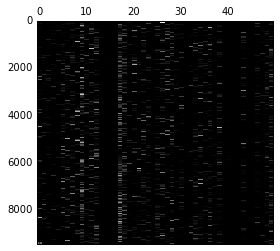

In [95]:
fig = plt.figure(1)
ax = fig.gca()
ax = ax.matshow(doc_topic_distrib, cmap=plt.cm.gray, aspect = '0.005')
plt.show()

In [99]:
def add_topic_weights(dataall,n_topics):
    columns = ['topic{0}'.format(topicnum) for topicnum in range(n_topics)]
    df = pd.DataFrame(index=dataall.index,columns=columns)
    for topicnum in range(n_topics):
        topicname = 'topic{0}'.format(topicnum)
        df[topicname] = doc_topic_distrib[:,topicnum]
    df.to_csv('topicweights{0}.csv'.format(n_topics))

In [100]:
topicweights = add_topic_weights(dataall,n_topics)